## License Information
---

This file is distributed as part of `swprocess`, a Python package for surface wave processing.

    Copyright (C) 2020 Joseph P. Vantassel (jvantassel@utexas.edu)

    This program is free software: you can redistribute it and/or modify
    it under the terms of the GNU General Public License as published by
    the Free Software Foundation, either version 3 of the License, or
    (at your option) any later version.

    This program is distributed in the hope that it will be useful,
    but WITHOUT ANY WARRANTY; without even the implied warranty of
    MERCHANTABILITY or FITNESS FOR A PARTICULAR PURPOSE.  See the
    GNU General Public License for more details.

    You should have received a copy of the GNU General Public License
    along with this program.  If not, see <https: //www.gnu.org/licenses/>.
    
## About _swprocess_ and this notebook
---

`swprocess` is a Python package for surface wave processing. `swprocess` was developed by
Joseph P. Vantassel under the supervision of Professor Brady R. Cox at The University of
Texas at Austin.

If you use _swprocess_ in your research or consulting, we ask you please cite the following:

__TBD__

<!-- >Joseph Vantassel. (2020). jpvantassel/hvsrpy: latest (Concept). Zenodo.
[http://doi.org/10.5281/zenodo.3666956](http://doi.org/10.5281/zenodo.3666956)
 _Note: For software, version specific citations should be preferred to
general concept citations, such as that listed above. To generate a version
specific citation for `hvsrpy`, please use the citation tool on the `hvsrpy`
[archive](http://doi.org/10.5281/zenodo.3666956)._
 -->

<!-- The automated frequency-domain window-rejection algorithm and log-normal statistics
implemented in `hvsrpy` were developed by Tianjian Cheng under the supervision of
Professor Brady R. Cox at The University of Texas at Austin. To
recognize their original work please cite the follwing:

> Cox, B. R., Cheng, T., Vantassel, J. P., and Manuel, L. (2020). “A statistical
> representation and frequency-domain window-rejection algorithm for single-station
> HVSR measurements.” Geophysical Journal International, 221(3), 2170-2183.

This notebook also provides automatic checking of the SESAME (2004) reliability
and clarity critera. To recognize their original work please also cite the following:

> SESAME. (2004). Guidelines for the Implementation of the H/V Spectral Ratio Technique on Ambient Vibrations
> Measurements, Processing, and Interpretation. European Commission - Research General Directorate, 62,
> European Commission - Research General Directorate.
 -->
 
## Getting Started
---
1. Install _swprocess_ and its dependencies, with `pip install swprocess`. If you are not familiar with `pip`, a useful tutorial can be found [here](https://jpvantassel.github.io/python3-course/#/intro/pip). __(~3 minutes)__ 

__TBD__

Happy Processing!

In [21]:
import numpy as np
import matplotlib.pyplot as plt

import swprocess
import swprepost

## Input
---

### Files

In [28]:
# File(s) in the .json format to import. These files are produced as the output of the mam.ipynb and the masw.ipynb. You may also wish
# to load .jsom files which contain the interatively trimmed experimental dispersion data produced by this notebook. See below for details.

# # Raw Rayleigh data
# fnames_set = [
#     ["../masw/nz_wghs_masw_rtbf.json"],
#     ["../mam/nz_wghs_rayleigh_c50_rtbf.json"],
#     ["../mam/nz_wghs_rayleigh_bigx_rtbf.json"]
#     ]

# Raw Love data
fnames_set = [
    ["../mam/nz_wghs_love_c50_rtbf.json"],
    ["../mam/nz_wghs_love_bigx_rtbf.json"]
    ]


# # Processed Data
# fnames_set = [
#     ["nz_wghs_processed_masw.json"],
#     ["nz_wghs_processed_c50.json"],
#     ["nz_wghs_processed_bigx.json"]
#     ]

### Plot Settings

In [29]:
# Domains in which to plot the experimental dispersion data.
domains = [
    ["frequency", "velocity"],
    ["wavelength", "velocity"],
]

# Colors one per `fnames_set` entry. Examples include: "limegreen", "dodgerblue", "tomatoe", "darkorange".
# A full listing is provided here: https://matplotlib.org/3.1.0/_images/sphx_glr_named_colors_003.png
# Colors may also be listed in hexidecimal.
# colors = ["limegreen", "dodgerblue", "tomato"]
colors = ["dodgerblue", "tomato"]

# Labels one per `fnames_set` entry.
# labels = ["MASW", "MAM - C50", "MAM - BigX"]
labels = ["MAM - C50", "MAM - BigX"]

## View Raw Data
---

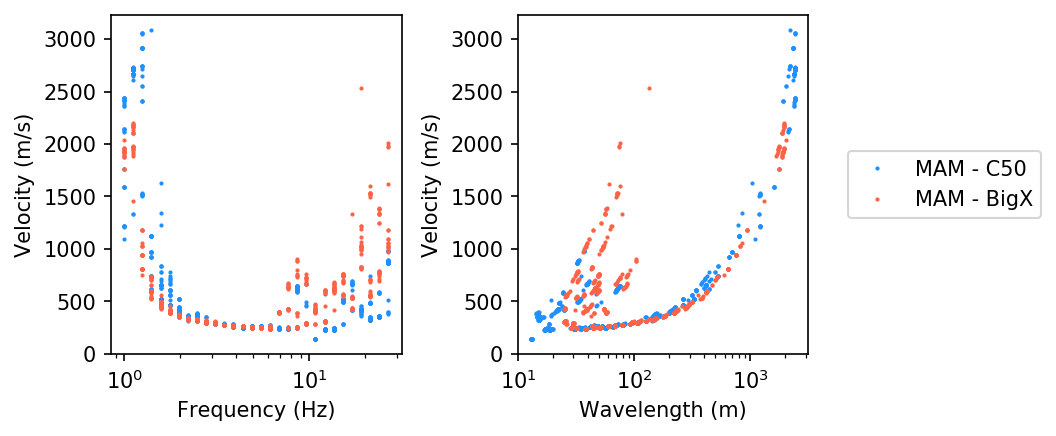

In [30]:
%matplotlib inline
xtype = [x for x, _ in domains]
ytype = [y for _, y in domains]

if len(fnames_set) != len(colors) or len(fnames_set) != len(labels):
    raise IndexError(f"fnames_set, colors, and labels must be the same length.")

fig, axs = plt.subplots(ncols=len(xtype), figsize=(6,3), dpi=150, gridspec_kw=dict(wspace=0.4))
suites = []
for fnames, color, label in zip(fnames_set, colors, labels):
    peaksuite = swprocess.PeaksSuite.from_json(fnames=fnames)
    peaksuite.plot(xtype=xtype, ax=axs, ytype=ytype, plot_kwargs=dict(color=color, label=label))
    suites.append(peaksuite)
    
axs[-1].legend(bbox_to_anchor = (1.1, 0.5), loc="center left")

plt.show()

master_suite = swprocess.PeaksSuite.from_peakssuite(suites)
_colors, _labels = [], []
for color, label, suite in zip(colors, labels, suites):
    for _ in range(len(suite)):
        _colors.append(color)
        _labels.append(label)
        label = None

## Interactive Trimming
---

### Workflow

In [31]:
# Workflow for interactive trimming {"individual", "together"}, "individual" is recommended.
workflow = "individual" 

### Array Resolution Limits

In [32]:
# Resolution limits, one per entry in fnames_set. Ingored if workflow="together".
# individual_resolution_limits = [
#     ["wavelength", (2, 50)],
#     ["wavenumber", (0.103/2, 0.246*2)],
#     ["wavenumber", (0.0639154/2, 0.12635*2)],
#     ]

individual_resolution_limits = [
    ["wavenumber", (0.103/2, 0.246*2)],
    ["wavenumber", (0.0639154/2, 0.12635*2)],
    ]

# Overall minimumm and maximum array resolution, only one entry permitted.
overall_resolution_limits = ["wavenumber", (0.103/2, 2*np.pi/2)]

### Bulk Trimming

In [33]:
# Bulk remove points outside of the specified screening criteria. Use `None` for one sided intervals. Multiple entries permitted.
bulk_trimming_limits = {
    "velocity" : [None, None],
}

### Launch

d:\currentresearch\swprocess\swprocess\peaks.py:375: RuntimeWarning: invalid value encountered in greater
  condition1 = np.logical_and(d1 > d1_min, d1 < d1_max)
d:\currentresearch\swprocess\swprocess\peaks.py:375: RuntimeWarning: invalid value encountered in less
  condition1 = np.logical_and(d1 > d1_min, d1 < d1_max)
d:\currentresearch\swprocess\swprocess\peaks.py:376: RuntimeWarning: invalid value encountered in greater
  condition2 = np.logical_and(d2 > d2_min, d2 < d2_max)
d:\currentresearch\swprocess\swprocess\peaks.py:376: RuntimeWarning: invalid value encountered in less
  condition2 = np.logical_and(d2 > d2_min, d2 < d2_max)


Enter (0 to quit, 1 to continue, 2 to undo):  1
Enter (0 to quit, 1 to continue, 2 to undo):  0
Enter (0 to quit, 1 to continue, 2 to undo):  1
Enter (0 to quit, 1 to continue, 2 to undo):  0
Enter (0 to quit, 1 to continue, 2 to undo):  0


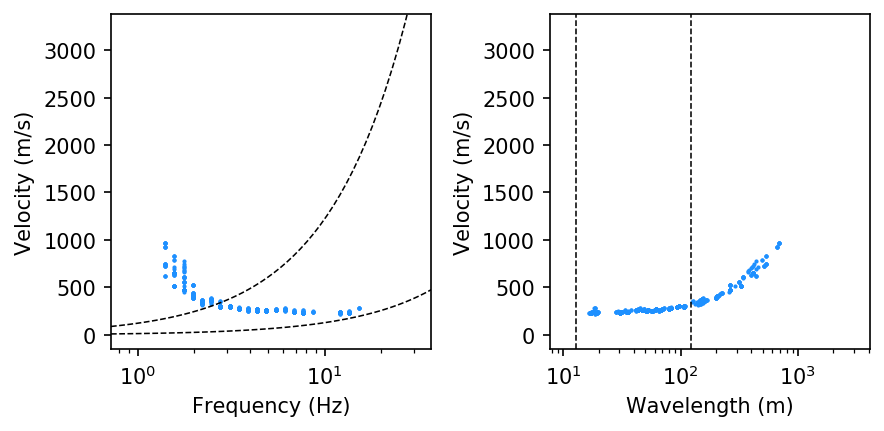

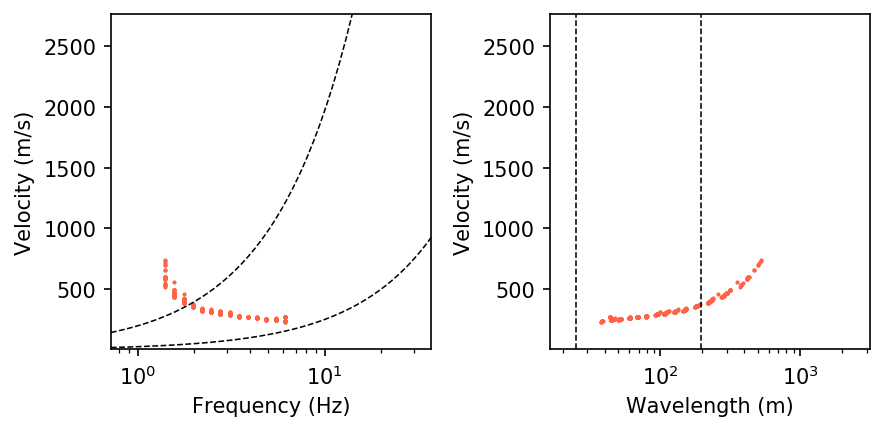

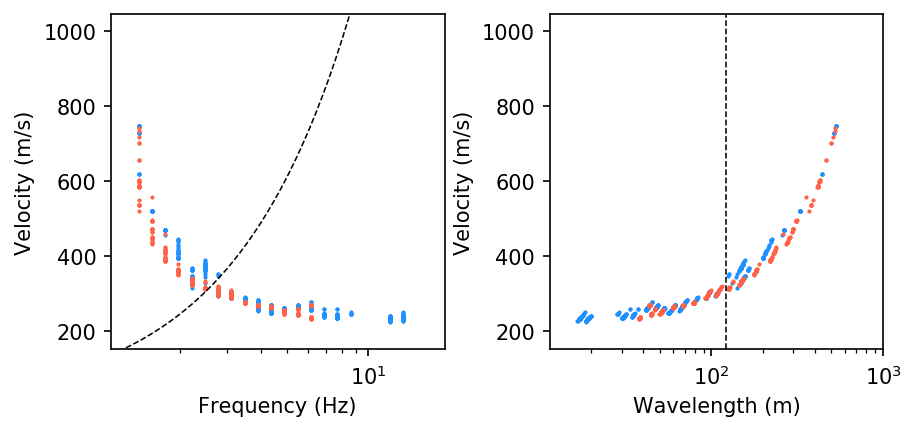

In [34]:
%matplotlib qt5
for suite in suites:
    for attribute, limits in bulk_trimming_limits.items():
        suite.blitz(attribute, limits)        

if workflow == "individual":
    if len(fnames_set) != len(individual_resolution_limits):
        raise IndexError(f"individidual_resolution_limits must have the same length as fnames_set.")

    for suite, color, label, _resolution_limits in zip(suites, colors, labels, individual_resolution_limits):
        suite.interactive_trimming(xtype=xtype, ytype=ytype, plot_kwargs=dict(color=color, label=label), resolution_limits=_resolution_limits)

master_suite.interactive_trimming(xtype=xtype, ytype=ytype, plot_kwargs=dict(color=_colors, label=_labels), resolution_limits=overall_resolution_limits)

## Plot Data Post Trimming
---

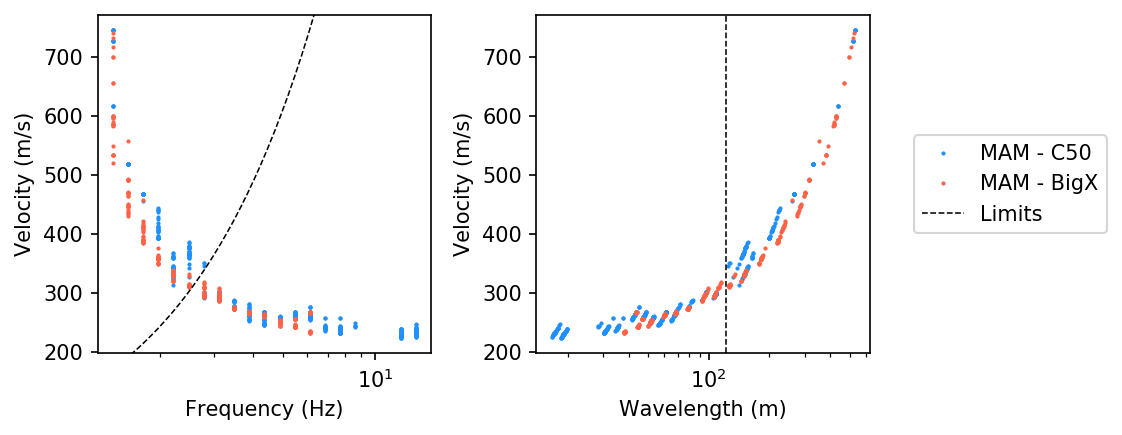

In [35]:
%matplotlib inline
fig, axs = master_suite.plot(xtype=xtype, ytype=ytype, plot_kwargs=dict(color=_colors, label=_labels))

for ax in axs:
    ax.autoscale(enable=True)

for ax, _xtype, _ytype in zip(axs, xtype, ytype):
    xlim, ylim = ax.get_xlim(), ax.get_ylim()
    attribute, limits = overall_resolution_limits
    master_suite.plot_resolution_limits(ax=ax, xtype=_xtype, ytype=_ytype, attribute=attribute, limits=limits, plot_kwargs=dict(label="Limits"))
    ax.set_xlim(xlim)
    ax.set_ylim(ylim)
    
axs[-1].legend(bbox_to_anchor = (1.1, 0.5), loc="center left")

plt.show()

## Statistics
---

TODO (jpv)
- Number of points

### Input

In [38]:
# Domain in which to calculate statistics.
xdomain, ydomain = "wavelength", "velocity"

# Statistic calculation points.
xmin, xmax, nx, xspace = 1, 1000, 40, "log"

### Plot

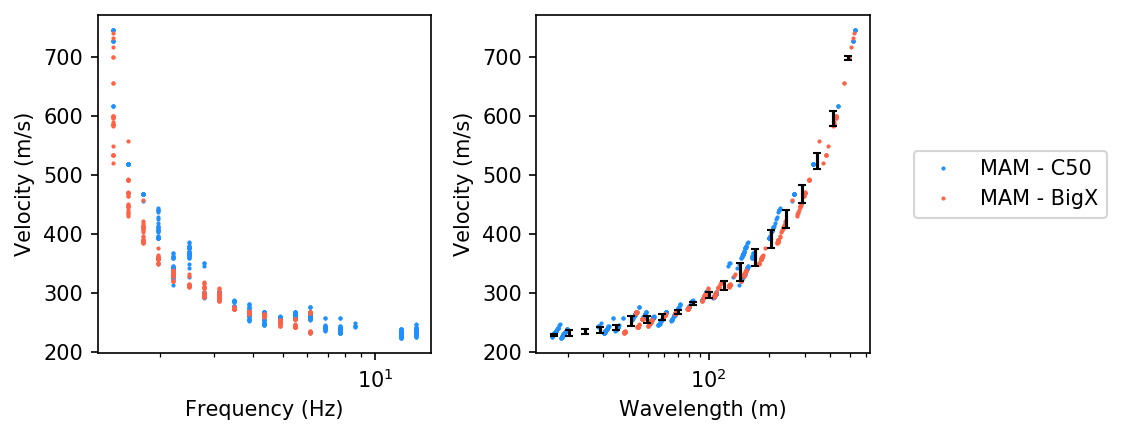

In [39]:
%matplotlib inline

xx = swprocess.wavefieldtransforms.AbstractWavefieldTransform._create_vector(pmin=xmin, pmax=xmax, pn=nx, pspace=xspace)
xx, mean, stddev, _ = master_suite.statistics(xtype=xdomain, ytype=ydomain, xx=xx, ignore_corr=True, drop_sample_if_fewer_count=1)

fig, axs = master_suite.plot(xtype=xtype, ytype=ytype, plot_kwargs=dict(color=_colors, label=_labels))

for ax, _xtype, _ytype in zip(axs, xtype, ytype):
    if _xtype == xdomain and _ytype == ydomain:
        master_suite.plot_statistics(ax=ax, xx=xx, mean=mean, stddev=stddev)

axs[-1].legend(bbox_to_anchor = (1.1, 0.5), loc="center left")

plt.show()

### Write to Experimental Dispersion Curve to `.txt`

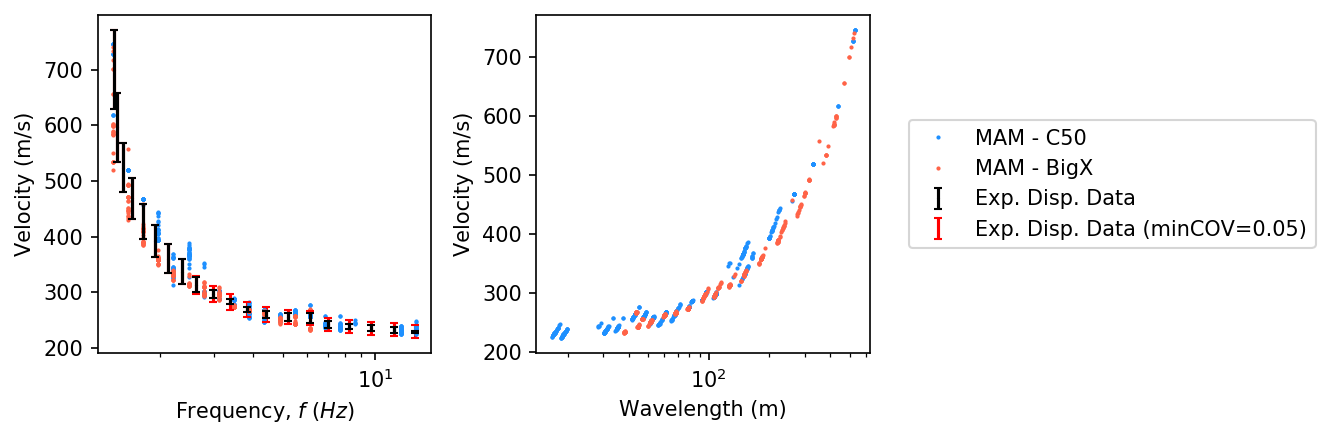

In [40]:
fname = "wghs_love_0.txt"
version = "2"
minimum_cov = 0.05

if xdomain == "frequency" and ydomain == "velocity":
    new_xx = np.array(xx)
    new_mean = np.array(mean)
    new_stddev = np.array(stddev)
elif xdomain == "wavelength" and ydomain == "velocity":
    new_xx = mean/xx
    new_mean = np.array(mean)
    upper = swprepost.Curve(x=(mean+stddev)/xx, y=mean+stddev)
    lower = swprepost.Curve(x=(mean-stddev)/xx, y=mean-stddev)
    new_stddev = ((upper.resample(xx=new_xx, interp1d_kwargs=dict(fill_value="extrapolate"))[1] - new_mean) + (new_mean - lower.resample(xx=new_xx, interp1d_kwargs=dict(fill_value="extrapolate"))[1])) /2
else:
    raise NotImplementedError()
    
%matplotlib inline
fig, axs = master_suite.plot(xtype=xtype, ytype=ytype, plot_kwargs=dict(color=_colors, label=_labels))

for ax, _xtype, _ytype in zip(axs, xtype, ytype):
    if _xtype == "frequency" and _ytype == "velocity":
        master_suite.plot_statistics(ax=ax, xx=new_xx, mean=new_mean, stddev=new_stddev, errorbar_kwargs=dict(label="Exp. Disp. Data"))

for index, _stddev in enumerate(new_stddev):
    if np.isnan(_stddev):
        new_stddev[index] = 0

target = swprepost.Target(frequency=new_xx, velocity=new_mean, velstd=new_stddev)
target.setmincov(minimum_cov)
ylabel = axs[0].get_ylabel()
target.plot(ax=axs[0], errorbarkwargs=dict(color="r", label=f"Exp. Disp. Data (minCOV={minimum_cov})"))
axs[0].set_ylabel(ylabel)
target.to_txt_dinver(fname=fname, version=version)

axs[0].legend(bbox_to_anchor = (2.4, 0.5), loc="center left")

plt.show()

## Write to trimmed data to `.json`
---

### Input

In [41]:
# File contents {"together", "indivdual"}. "together" all sets are combined into a single file. "individual" all sets are saved to separate files.
file_contents = "individual"

# Output prefix.
# output_prefix = "nz_wghs_processed_rayleigh"
output_prefix = "nz_wghs_processed_love"

# If file_contents == "indivdual", define unique suffixes for each output file.
# output_suffixes = ["masw", "c50", "bigx"]
output_suffixes = ["c50", "bigx"]

### Write

In [42]:
if file_contents == "together":
    master_suite.to_json(f"{output_prefix}.json")
else:
    if len(output_suffixes) != len(suites):
        raise IndexError(f"suites and indivdual suffixes are of different length.")
    for suite, suffix in zip(suites, output_suffixes):
        suite.to_json(f"{output_prefix}_{suffix}.json")